req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\adars\AppData\Local\Temp\fastf1.
	Size: 44.66 MB
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.1.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20

VER: 324.00 km/h
PER: 323.00 km/h
NOR: 319.00 km/h
SAI: 322.00 km/h
ALO: 325.00 km/h
PIA: 319.00 km/h
HAM: 319.00 km/h
LEC: 319.00 km/h
RUS: 321.00 km/h
TSU: 324.00 km/h
RIC: 322.00 km/h
HUL: 328.00 km/h
BOT: 322.00 km/h
ALB: 326.00 km/h
OCO: 322.00 km/h
STR: 320.00 km/h
GAS: 322.00 km/h
MAG: 326.00 km/h
SAR: 322.00 km/h
ZHO: 321.00 km/h


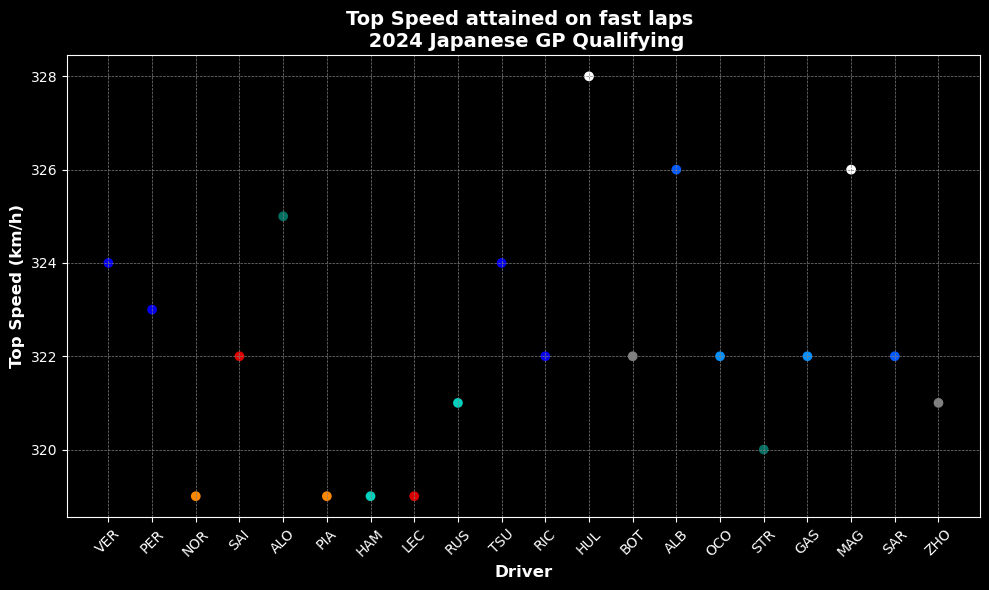

In [1]:
import matplotlib.pyplot as plt
import fastf1
from fastf1.plotting import team_color

session = fastf1.get_session(2024, 'Japan', 'Q')
session.load()

driver_names = []
teams = []
top_speeds = []
dot_colors = []

for driver_name in session.laps['Driver'].unique():
    driver_lap = session.laps.pick_driver(driver_name).pick_fastest()
    driver_tel = driver_lap.get_car_data()
    

    top_speed_index = driver_tel['Speed'].idxmax()
    top_speed = driver_tel['Speed'][top_speed_index]
    
    print(f"{driver_name}: {top_speed:.2f} km/h")
    
    driver_names.append(driver_name)
    teams.append(driver_lap['Team'])
    top_speeds.append(top_speed)
    
    try:
        color = team_color(driver_lap['Team'])
    except KeyError:
        color = 'grey'
    
    dot_colors.append(color)

plt.figure(figsize=(10, 6))
plt.scatter(driver_names, top_speeds, color=dot_colors)

plt.xlabel('Driver', fontsize=12, fontweight='bold', color='white')
plt.ylabel('Top Speed (km/h)', fontsize=12, fontweight='bold', color='white')
plt.title('Top Speed attained on fast laps \n 2024 Japanese GP Qualifying', fontsize=14, fontweight='bold', color='white')

plt.xticks(rotation=45, fontsize=10, color='white') 

plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()

plt.gca().set_facecolor('black')

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.gcf().set_facecolor('black')

plt.show()